# **Classificação de E-mails: Uma Abordagem com Ciência de Dados.**

Neste notebook, abordaremos como a ciência de dados pode ser aplicada para classificar e-mails como spam ou não spam. A classificação de e-mails é uma tarefa importante para melhorar a experiência do usuário ao filtrar mensagens indesejadas. Neste notebook será seguida uma abordagem passo a passo usando Python e bibliotecas populares de aprendizado de máquina e processamento de linguagem natural (PLN).

#**Abordagens para a Classificação**

Na classificação de e-mails em spam ou não spam, várias técnicas de aprendizado de máquina e ciência de dados podem ser utilizadas. Aqui estão algumas das abordagens comuns:

1. Naive Bayes: O classificador Naive Bayes é amplamente usado na classificação de texto, incluindo a classificação de e-mails. Ele funciona bem para tarefas de processamento de linguagem natural, como a classificação de palavras-chave e análise de texto.
2. Random Forest: Uma extensão das árvores de decisão, o Random Forest é um algoritmo de conjunto que combina várias árvores de decisão para melhorar o desempenho e a generalização.
3. Processamento de Linguagem Natural (NLP): Técnicas avançadas de NLP, como modelos de linguagem pré-treinados (por exemplo, BERT, GPT) ou análise de sentimentos, podem ser incorporadas para melhorar a detecção de spam.

#**Classificação Geral**

A ciência de dados desempenha um papel fundamental na classificação de e-mails em spam ou não spam. Aqui vamos ter uma implementação geral dessa aboordagem, nela será utilizado o conjunto de dados "spambase_ham_dataset.csv", encontrado em:https://archive.ics.uci.edu/dataset/94/spambase, que possui uma quantidade de 4601 instâncias para a classificação com o modelo produzido:

1. **Coleta e Preparação de Dados:**
   - A ciência de dados começa com a coleta de dados relevantes. Para classificar e-mails, é necessário ter um conjunto de dados que contenha e-mails rotulados como spam e não spam. A ciência de dados ajuda a coletar, limpar e preparar esses dados, removendo duplicatas, tratando valores ausentes e realizando outras operações de limpeza. Na etapa inicial é realizada as importações.
   

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
import nltk

2. **Pré-processamento de Texto:**
   - Os e-mails geralmente contêm texto não estruturado. A ciência de dados aplica técnicas de pré-processamento de texto, como tokenização, remoção de stop words, normalização de texto (por exemplo, transformando em caracteres em representação numérica)para transformar o texto em formato adequado para análise.


3. **Modelagem e Aprendizado de Máquina:**
   - A ciência de dados aplica algoritmos de aprendizado de máquina, como Naive Bayes, Support Vector Machines (SVM), árvores de decisão ou redes neurais, para treinar modelos de classificação. Esses modelos são alimentados com os dados preparados e usados para aprender a distinguir entre spam e não spam com base nos recursos extraídos. Nesse caso, a opção de utilização foi "Random Forest".


In [4]:

nltk.download("stopwords")
nltk.download("punkt")

# Conjunto de dados CSV
data = pd.read_csv("spam_ham_dataset.csv")

# Tokenização do texto
data["tokenized_text"] = data["text"].apply(lambda text: word_tokenize(text))

# Concatena os tokens
data["tokenized_text"] = data["tokenized_text"].apply(lambda tokens: " ".join(tokens))

# Pré-processamento do texto
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X = tfidf_vectorizer.fit_transform(data["tokenized_text"])
y = data["label_num"]

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo "Random Forest"
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


RandomForestClassifier(random_state=42)

4. **Avaliação de Desempenho:**
   - Após o treinamento do modelo, a ciência de dados avalia seu desempenho usando métricas como precisão, recall, F1-score e acurácia. Isso ajuda a determinar quão bem o modelo está classificando os e-mails e se precisa ser ajustado.

5. **Ajuste de Parâmetros:**
   - A ciência de dados realiza ajustes nos parâmetros do modelo para otimizar seu desempenho. Isso envolve a experimentação com diferentes configurações do modelo para encontrar a combinação que produz os melhores resultados.


In [5]:
# Previsões do modelo
y_pred = rf_classifier.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["ham", "spam"])

print(f"Acurácia do modelo: {accuracy:.2f}")
print("Relatório de classificação:\n", report)


Acurácia do modelo: 0.98
Relatório de classificação:
               precision    recall  f1-score   support

         ham       0.99      0.97      0.98       742
        spam       0.94      0.98      0.96       293

    accuracy                           0.98      1035
   macro avg       0.96      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035



No machine learning desenvolvido foi utilizado o algoritmo "Random Forest" para a classificação de e-mails como spam ou não spam. A classificação ocorreu da seguinte forma: Ham (não-spam) e Spam.

1. Acurácia do Modelo: O modelo alcançou uma acurácia de 0,98, o que significa que classificou corretamente aproximadamente 98% dos e-mails como spam ou não spam.

2. Precision e Recall: A precisão (precision) e o recall são métricas importantes. A precisão para a classe "spam" é de 0,99, o que significa que quando o modelo classifica um e-mail como spam, ele está correto em 99% das vezes. O recall para a classe "spam" é de 0,97, indicando que o modelo identifica 97% de todos os e-mails de spam presentes no conjunto de dados.

3. F1-Score: O F1-score é uma métrica que leva em consideração tanto a precisão quanto o recall. O F1-score médio é de 0,98, o que indica um bom equilíbrio entre precisão e recall.

Demonstração Gráfica:



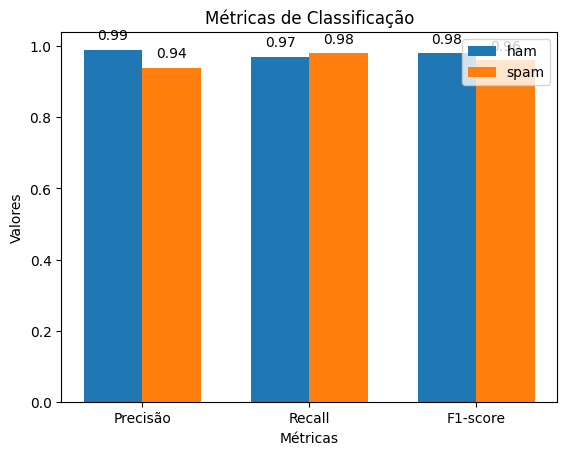

In [1]:
import matplotlib.pyplot as plt

categorias = ['Precisão', 'Recall', 'F1-score']
ham_metrics = [0.99, 0.97, 0.98]
spam_metrics = [0.94, 0.98, 0.96]

x = range(len(categorias))

width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, ham_metrics, width, label='ham')
rects2 = ax.bar([i + width for i in x], spam_metrics, width, label='spam')

for i, v in enumerate(ham_metrics):
    ax.text(i, v + 0.02, str(v), ha='center', va='bottom')
for i, v in enumerate(spam_metrics):
    ax.text(i + width, v + 0.02, str(v), ha='center', va='bottom')

ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Métricas de Classificação')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(categorias)
ax.legend()

plt.show()


Ao fim dos testes temos uma quantia (support) de 1035 instâncias por que as outras 3566 instâncias foram usadas para o treinamento, ficando 1035 para testes.



Em resumo, a ciência de dados fornece as ferramentas e técnicas necessárias para coletar, processar, modelar e implementar sistemas de classificação de e-mails em spam ou não spam, melhorando assim a experiência do usuário e a segurança das caixas de entrada de e-mail.